<a href="https://colab.research.google.com/github/MohamedAziz15/ReggressorCost-Competition/blob/main/Cost_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/AllBatches.csv',sep=",",encoding="UTF-8")

df.head()


,ID,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,...,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
0,mc_ID_0,Single,F,4,bachelors degree,professional,H11go_ZA,Cleaning Supplies,Household,Red Wing,...,28.1997,26.6008,1.5990,1.0,10000.0,481.98,323.00,602.7575,2842.23,2037.64
1,mc_ID_1,Single,F,3,bachelors degree,management,S04ne_WA,Snack Foods,Snack Foods,Nationeel,...,16.5710,14.9720,1.5990,0.0,50000.0,457.36,NaN,708.6650,2814.95,2049.72
2,mc_ID_2,Married,M,2,high school degree,skilled manual,L05es_CA,Magazines,Periodicals,Excel,...,28.6358,27.1822,1.4536,1.0,30000.0,523.32,348.85,564.2647,2192.32,1322.21
3,mc_ID_3,Single,F,3,partial college,professional,S03le_WA,Dairy,Dairy,Carlson,...,14.2161,11.2944,2.9217,1.0,30000.0,440.92,293.95,724.5119,1974.73,NaN
4,mc_ID_4,Married,F,5,bachelors degree,professional,M10da_YU,Vegetables,Produce,Hermanos,...,12.6172,9.7100,2.9072,0.0,50000.0,593.93,395.95,519.7574,2862.30,1872.19


# Data Preview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             25906 non-null  object 
 1   marital state                  38862 non-null  object 
 2   gender                         38862 non-null  object 
 3   Number Of Childrens            38862 non-null  int64  
 4   education                      38862 non-null  object 
 5   working status                 38862 non-null  object 
 6   Place Code                     38862 non-null  object 
 7   Customer Order                 38860 non-null  object 
 8   department                     38860 non-null  object 
 9   Ordered Brand                  38860 non-null  object 
 10  Additional Features in market  34562 non-null  object 
 11  Promotion Name                 33034 non-null  object 
 12  Store Kind                     33053 non-null 

In [5]:
df.describe()

,Number Of Childrens,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
count,38862.000000,25893.000000,25899.000000,36920.000000,36924.000000,35284.000000,19440.000000,38854.000000,35308.000000,35312.000000,38831.000000,35296.000000,35253.000000
mean,2.528331,6.539923,2.616668,20.054378,17.141925,2.925647,0.558025,48411.489165,493.541748,328.944921,519.224643,2597.993526,1775.509665
std,1.488920,3.456732,1.447893,6.716412,6.813656,1.010982,0.496634,36239.308013,145.973261,97.120302,156.875169,528.796266,371.303570
min,0.000000,0.510000,0.163200,8.721600,4.433500,1.453500,0.000000,10000.000000,227.800000,149.900000,265.631700,1882.700000,1233.080000
25%,1.000000,3.810000,1.497800,14.056200,11.207200,2.907100,0.000000,30000.000000,440.920000,293.277500,364.269500,2189.410000,1507.540000
50%,3.000000,5.920000,2.376000,19.768900,16.861700,2.907200,1.000000,30000.000000,470.270000,313.550000,515.259600,2572.860000,1734.500000
75%,4.000000,8.680000,3.484600,25.728600,23.257500,3.052500,1.000000,70000.000000,534.290000,356.190000,662.222600,2863.822500,2052.610000
max,5.000000,19.900000,9.384000,31.833700,30.234700,4.506200,1.000000,150000.000000,1783.640000,570.740000,783.192500,7857.550000,8103.200000


In [6]:
df.shape

(38862, 25)

In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Number Of Childrens,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
Number Of Childrens,1.000000,0.083521,0.077295,-0.003543,-0.003419,-0.005100,0.007935,-0.008837,-0.025374,-0.029307,-0.008209,-0.000727,0.014984
Store Sales,0.083521,1.000000,0.954088,0.040320,0.037016,0.018535,0.033915,0.001978,0.015373,0.013480,-0.007844,0.023657,0.013993
Store Cost,0.077295,0.954088,1.000000,0.040458,0.037347,0.017225,0.031196,0.001670,0.017209,0.015158,-0.009438,0.025833,0.016574
Gross Weight,-0.003543,0.040320,0.040458,1.000000,0.988917,-0.015545,0.051160,0.001785,-0.003228,-0.004203,-0.002982,-0.002060,-0.004931
Net Weight,-0.003419,0.037016,0.037347,0.988917,1.000000,-0.163821,0.053975,0.001884,-0.000091,-0.001578,-0.001335,-0.001631,-0.006284
Package Weight,-0.005100,0.018535,0.017225,-0.015545,-0.163821,1.000000,-0.024112,0.000921,-0.000842,0.000952,0.000502,-0.001011,-0.003921
Is Recyclable?,0.007935,0.033915,0.031196,0.051160,0.053975,-0.024112,1.000000,-0.000046,0.004568,-0.003305,-0.006578,0.000572,0.004810
Min. Yearly Income,-0.008837,0.001978,0.001670,0.001785,0.001884,0.000921,-0.000046,1.000000,-0.000636,-0.001023,-0.007051,0.002815,0.007332
Frozen Area,-0.025374,0.015373,0.017209,-0.003228,-0.000091,-0.000842,0.004568,-0.000636,1.000000,0.999228,-0.043795,0.783248,0.462164
Meat Area,-0.029307,0.013480,0.015158,-0.004203,-0.001578,0.000952,-0.003305,-0.001023,0.999228,1.000000,-0.045041,0.783758,0.465852


#### plotting Correlation

<ipython-input-9-fa256436df5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

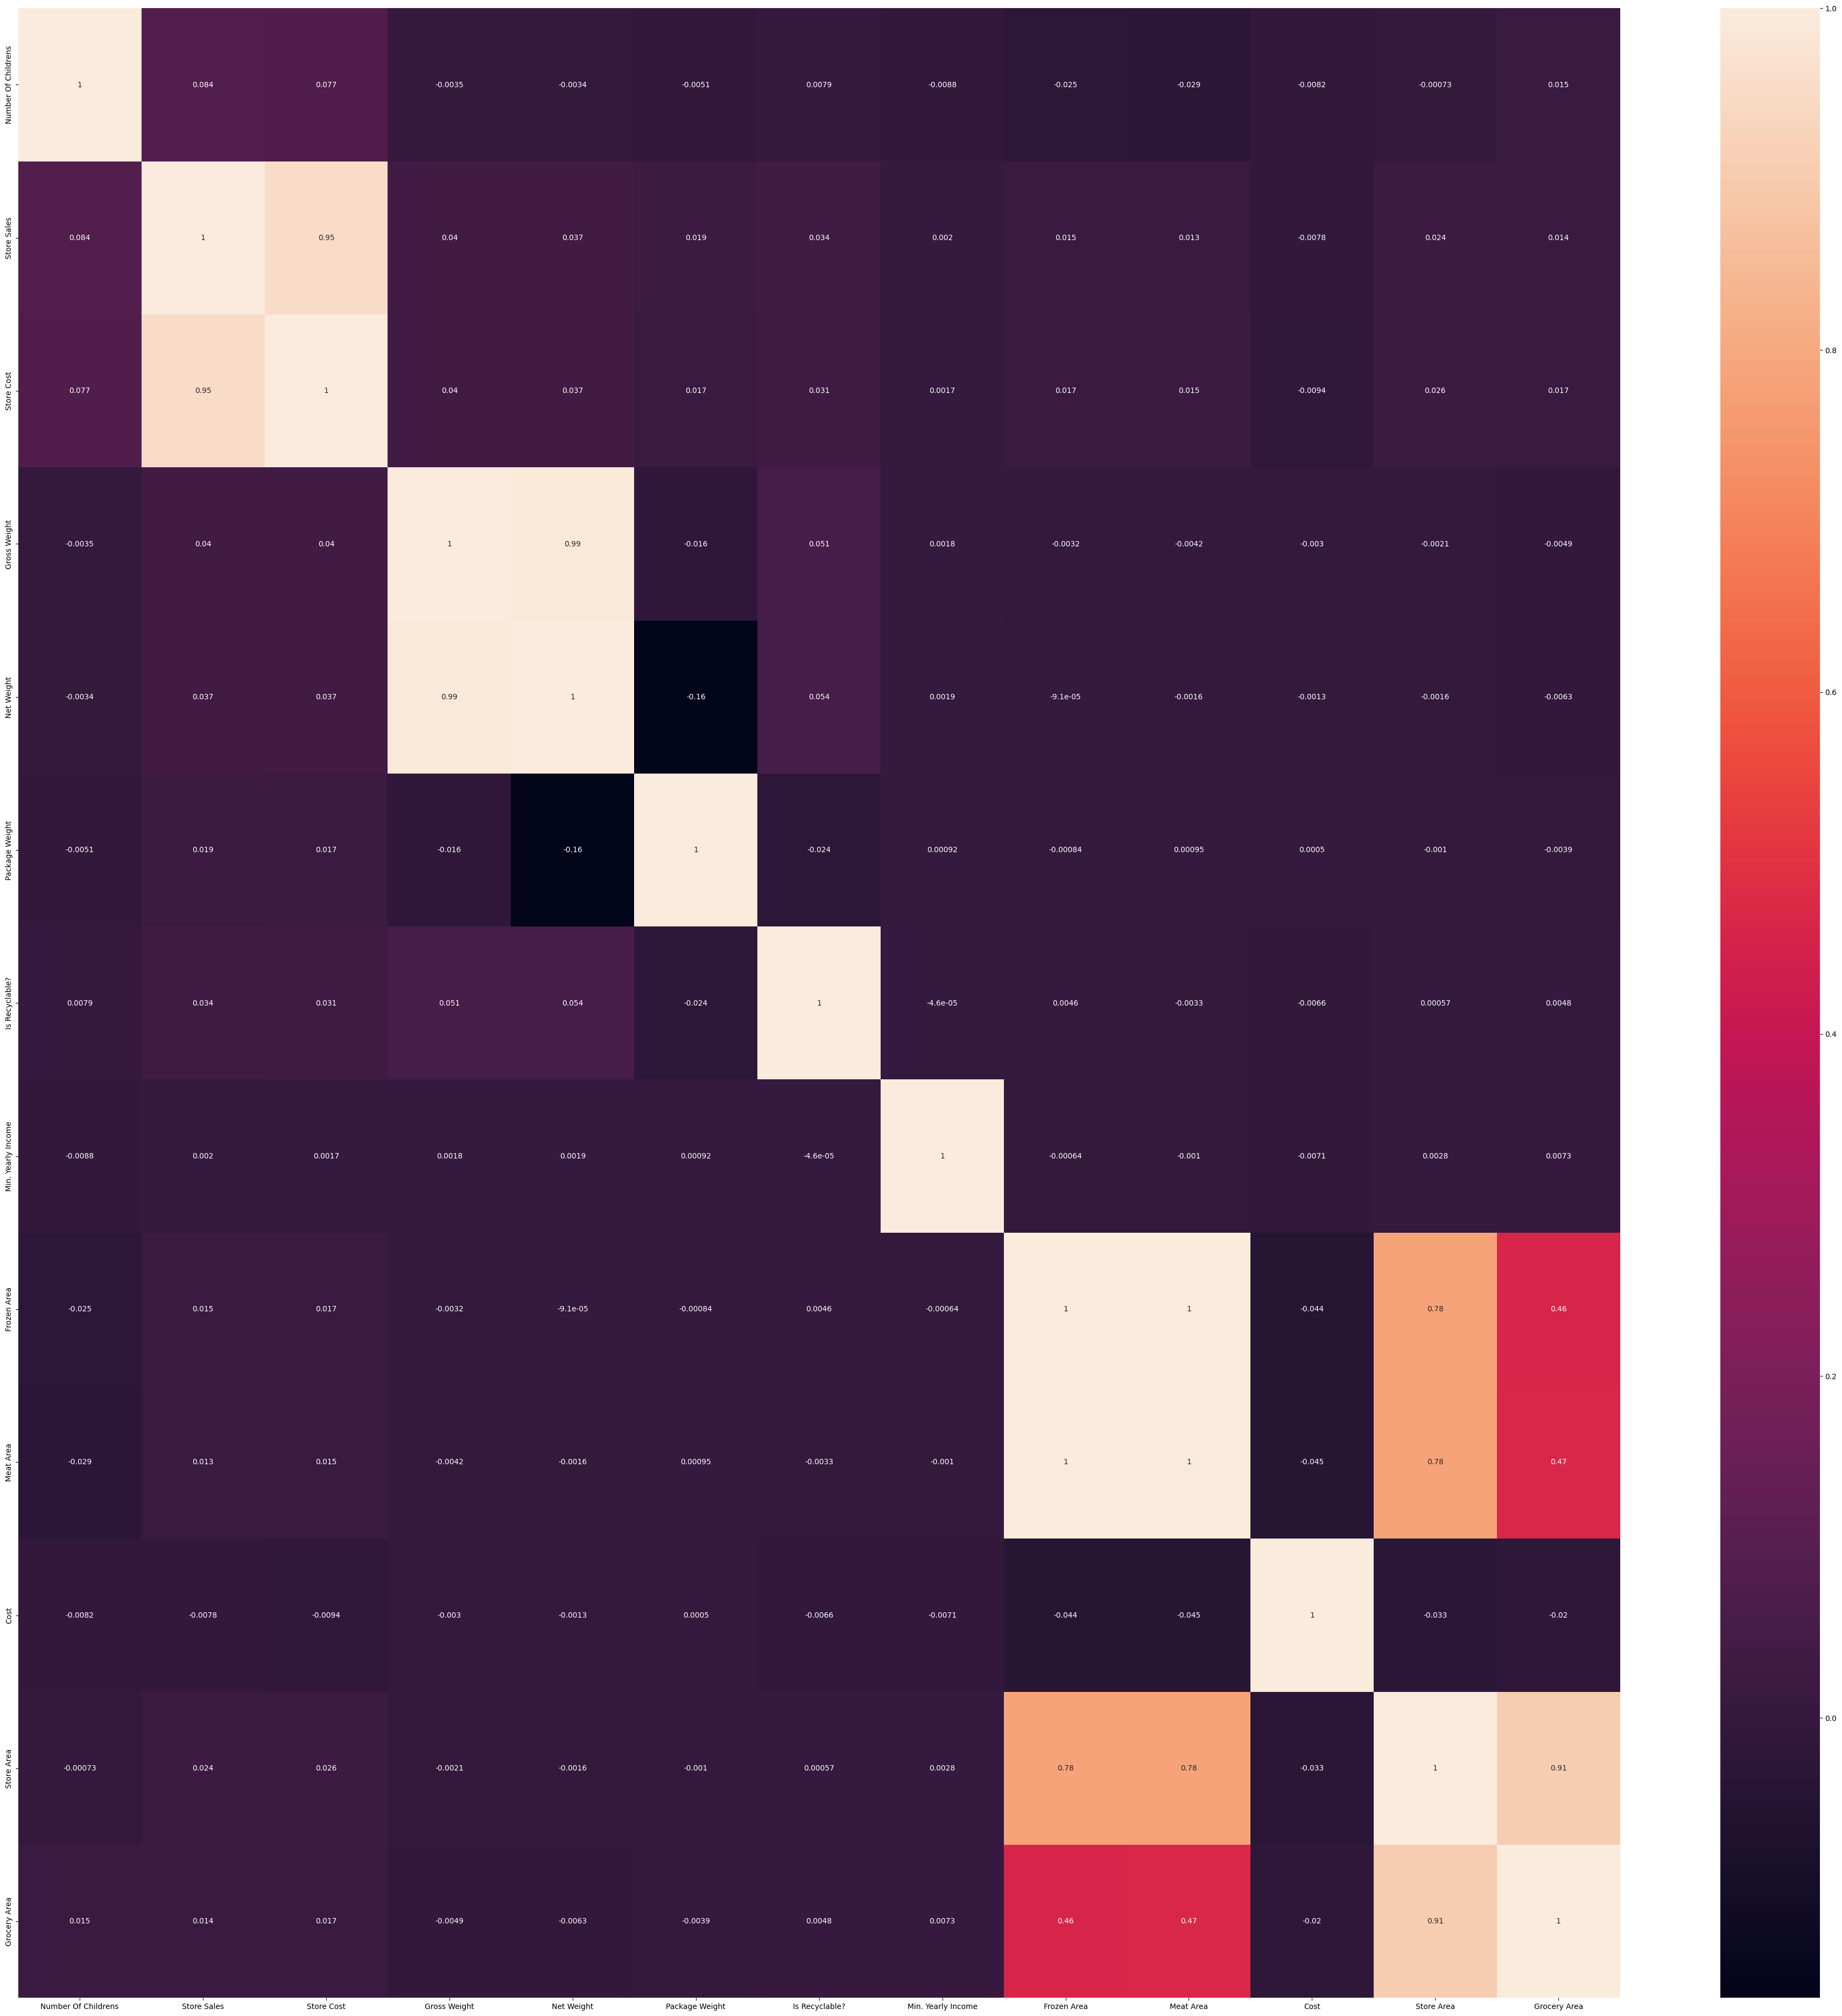

In [9]:
plt.subplots(figsize = (48, 48))
sns.heatmap(df.corr(), annot = True)

In [12]:
# correlationC=[]
# for column in df.columns :
#     for columnC in df.columns:
#         a = df[column].corr(df[columnC])
#         if a > 0.8 and (column != columnC) :
#             if a in correlationC:
#                 continue
#             else :
#                 correlationC.append(a)
#                 print (column +" column has high correlation with column "+ columnC)
#                 print(df[column].corr(df[columnC]))
#                 print("*******************************")

In [13]:
df_copy = df[:]
df_copy

,ID,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,...,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
0,mc_ID_0,Single,F,4,bachelors degree,professional,H11go_ZA,Cleaning Supplies,Household,Red Wing,...,28.1997,26.6008,1.5990,1.0,10000.0,481.98,323.00,602.7575,2842.23,2037.64
1,mc_ID_1,Single,F,3,bachelors degree,management,S04ne_WA,Snack Foods,Snack Foods,Nationeel,...,16.5710,14.9720,1.5990,0.0,50000.0,457.36,NaN,708.6650,2814.95,2049.72
2,mc_ID_2,Married,M,2,high school degree,skilled manual,L05es_CA,Magazines,Periodicals,Excel,...,28.6358,27.1822,1.4536,1.0,30000.0,523.32,348.85,564.2647,2192.32,1322.21
3,mc_ID_3,Single,F,3,partial college,professional,S03le_WA,Dairy,Dairy,Carlson,...,14.2161,11.2944,2.9217,1.0,30000.0,440.92,293.95,724.5119,1974.73,NaN
4,mc_ID_4,Married,F,5,bachelors degree,professional,M10da_YU,Vegetables,Produce,Hermanos,...,12.6172,9.7100,2.9072,0.0,50000.0,593.93,395.95,519.7574,2862.30,1872.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38857,mc_ID_6461,Single,F,4,high school degree,manual,C15ho_ZA,Snack Foods,Snack Foods,Fort West,...,29.2172,27.7636,1.4536,NaN,30000.0,385.45,256.97,773.0986,2207.28,1564.86
38858,mc_ID_6462,Single,M,1,bachelors degree,management,T02ma_WA,Carbonated Beverages,Beverages,Washington,...,22.9668,20.0596,2.9072,NaN,70000.0,654.13,436.09,779.6884,3145.51,2055.29
38859,mc_ID_6463,Married,M,0,partial high school,professional,S03le_WA,Specialty,Produce,Tri-State,...,28.6358,24.2750,4.3608,NaN,90000.0,440.92,293.95,473.7334,1974.49,1236.07
38860,mc_ID_6464,Single,F,1,high school degree,skilled manual,S03le_WA,Jams and Jellies,Baking Goods,Plato,...,30.3801,25.8740,4.5061,NaN,50000.0,440.92,293.95,349.2594,1973.77,1236.07


# Data Preprocessing and Cleaning

In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}
df.rename(columns=new_columns, inplace=True)
df.keys()

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
19435     True
19436     True
19437     True
19438     True
19439     True
Length: 19440, dtype: bool

In [ ]:
df.duplicated().sum()


8

In [ ]:
df= df.drop_duplicates()
df.shape

(19432, 17)

In [14]:
df.isnull().any()

ID                                True
marital state                    False
gender                           False
Number Of Childrens              False
education                        False
working status                   False
Place Code                       False
Customer Order                    True
department                        True
Ordered Brand                     True
Additional Features in market     True
Promotion Name                    True
Store Kind                        True
Store Sales                       True
Store Cost                        True
Gross Weight                      True
Net Weight                        True
Package Weight                    True
Is Recyclable?                    True
Min. Yearly Income                True
Frozen Area                       True
Meat Area                         True
Cost                              True
Store Area                        True
Grocery Area                      True
dtype: bool

In [15]:
df.isnull().sum()

ID                               12956
marital state                        0
gender                               0
Number Of Childrens                  0
education                            0
working status                       0
Place Code                           0
Customer Order                       2
department                           2
Ordered Brand                        2
Additional Features in market     4300
Promotion Name                    5828
Store Kind                        5809
Store Sales                      12969
Store Cost                       12963
Gross Weight                      1942
Net Weight                        1938
Package Weight                    3578
Is Recyclable?                   19422
Min. Yearly Income                   8
Frozen Area                       3554
Meat Area                         3550
Cost                                31
Store Area                        3566
Grocery Area                      3609
dtype: int64

In [ ]:
df['Additional Features in market'].isnull().sum()

4297

In [ ]:
df['Store Kind'].isnull().sum()

2909

#### Additional Features in market

In [ ]:
df['Additional Features in market'].isnull().sum()

4297

In [16]:
df['Additional Features in market'].value_counts()

['Coffee Bar']                                                             4498
[]                                                                         4291
['Florist']                                                                2588
['Ready Food', 'Bar For Salad']                                            1992
['Bar For Salad', 'Ready Food']                                            1869
                                                                           ... 
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      93
['Ready Food', 'Coffee Bar', 'Bar For Salad', 'Florist', 'Video Store']      93
['Bar For Salad', 'Video Store', 'Coffee Bar', 'Ready Food', 'Florist']      92
['Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar', 'Video Store']      89
['Ready Food', 'Video Store', 'Bar For Salad', 'Florist', 'Coffee Bar']      86
Name: Additional Features in market, Length: 151, dtype: int64

In [ ]:
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,'Additional Features in market']
    if type(item) == float :
      item = 'nan'
    # print(type(item))
    # print(item)
    if len(item) == 71:
      # print(item)
      # print('----------------------------------------')
      df.loc[i,'Additional Features in market'] = "['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']"
    elif  len(item) == 56:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']"
    elif  len(item) == 31:
      df.loc[i,'Additional Features in market'] = "['Ready Food', 'Bar For Salad']"
    elif  len(item) == 25:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Florist']"


In [ ]:

df['Additional Features in market'].value_counts()


['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']    6868
['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']                   2571
['Coffee Bar']                                                             2229
['Ready Food', 'Bar For Salad']                                            1969
['Florist']                                                                1321
['Coffee Bar', 'Florist']                                                   177
Name: Additional Features in market, dtype: int64

In [ ]:
# Decode ((Additional Features in market))
df['Additional Features in market'] = df['Additional Features in market'].replace(["['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']","['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']","['Coffee Bar']","['Ready Food', 'Bar For Salad']","['Florist']","['Coffee Bar', 'Florist']"]
                                                                                 , [1,2,3,4,5,6])
df['Additional Features in market'].value_counts()

1.0    6868
2.0    2571
3.0    2229
4.0    1969
5.0    1321
6.0     177
Name: Additional Features in market, dtype: int64

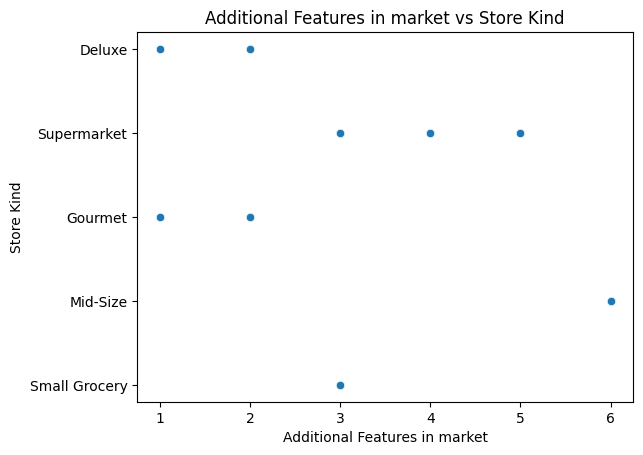

In [ ]:
# Scatter plot using Seaborn
sns.scatterplot(x='Additional Features in market', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Additional Features in market')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

In [ ]:
df['Additional Features in market'].isnull().sum()

4297

In [ ]:
# def fillNULL_AdditionalFeaturesinmarket():


#### store Kind

<Axes: title={'center': 'Level Column Values'}, ylabel='Store Kind'>

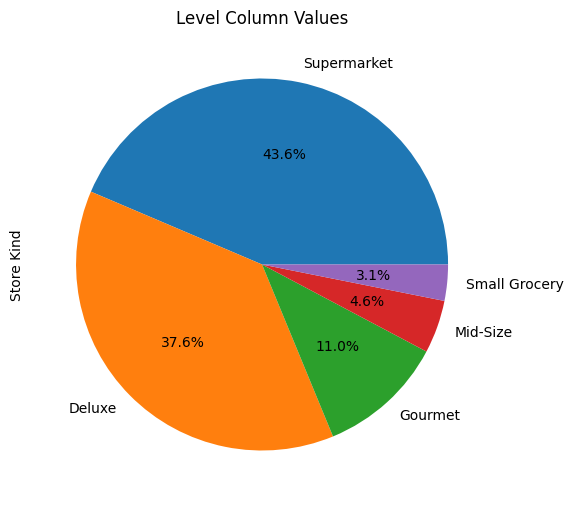

In [ ]:
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["Store Kind"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [ ]:
df["Store Kind"].value_counts()

Supermarket      7204
Deluxe           6218
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

In [ ]:
# Decode ((Additional Features in market))
df["Store Kind"] = df["Store Kind"].replace(["Supermarket","Deluxe","Gourmet","Mid-Size","Small Grocery"]
                                                                                 , [1,2,3,4,5])
df["Store Kind"].value_counts()

1.0    7204
2.0    6218
3.0    1821
4.0     761
5.0     519
Name: Store Kind, dtype: int64

#### Promotion Name

In [ ]:
df.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...",1.0,Dimes Off,2.0,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,1.0,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",5.0,Shelf Emptiers,1.0,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",3.0,Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...",1.0,Sale Winners,2.0,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


In [ ]:
df["Promotion Name"].value_counts()

Save Price                  676
Weekend Discount            659
Two Day Sale                633
Price Winners               578
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         458
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 406
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               322
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Promotion Name"] = le.fit_transform(df["Promotion Name"])


In [ ]:
df["Promotion Name"].value_counts()

49    2910
34     676
47     659
44     633
26     578
40     568
33     541
20     519
39     508
28     497
13     478
24     476
12     463
37     458
29     457
17     418
45     406
3      400
14     394
18     379
23     369
5      360
35     351
8      332
1      327
22     322
7      301
36     298
0      287
27     285
48     283
32     279
16     270
31     260
42     257
30     257
43     250
21     247
2      235
38     228
4      202
9      148
46     139
15     134
25     127
19     122
6      114
41      87
11      76
10      67
Name: Promotion Name, dtype: int64

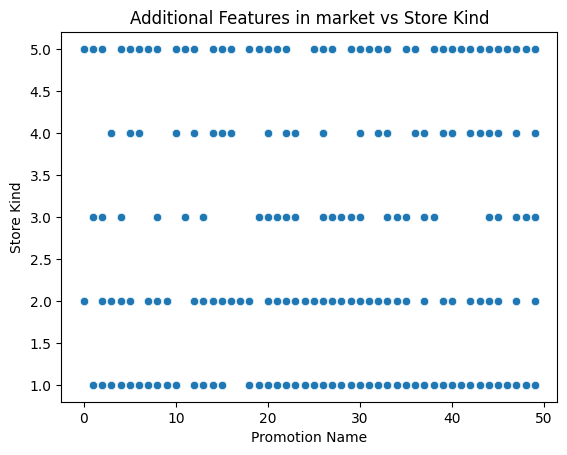

In [ ]:
# Scatter plot using Seaborn
sns.scatterplot(x='Promotion Name', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Promotion Name')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

#### Is Recyclable?

In [ ]:
df["Is Recyclable?"] = df["Is Recyclable?"].replace(["recyclable","non recyclable"],[1,0])
df["Is Recyclable?"].value_counts()

1    10842
0     8590
Name: Is Recyclable?, dtype: int64

[Text(0.5, 1.0, 'Is Recyclable?')]

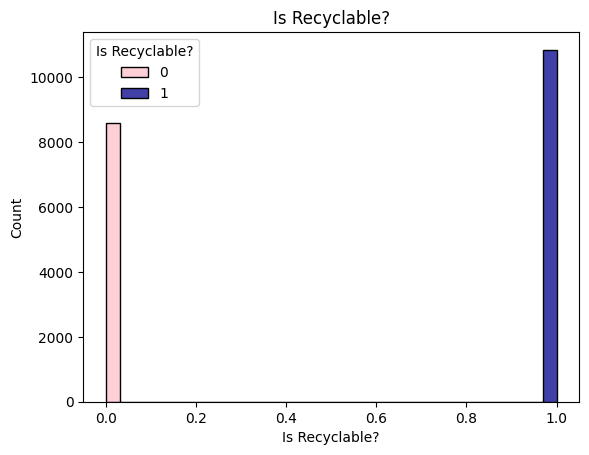

In [ ]:
# plt.subplots(figsize=(8, 4))
sns.histplot(data=df, x=df["Is Recyclable?"], hue=df["Is Recyclable?"], multiple="dodge",palette=["pink","darkblue"]).set(title='Is Recyclable?')

#### Place Code

In [ ]:
df['Place Code'].value_counts()

T02ma_WA    1802
S01em_OR    1771
P07nd_OR    1668
S03le_WA    1625
H11go_ZA    1508
M10da_YU    1451
S04ne_WA    1409
B06ls_CA    1355
L05es_CA    1321
B14on_WA    1108
V13er_BC    1072
O09ba_VE     861
C15ho_ZA     769
A17co_GU     502
M12ty_DF     429
S18co_CA     253
B08am_WA     228
V19ia_BC     177
G16ra_JA     123
Name: Place Code, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Place Code'] = le.fit_transform(df['Place Code'])

In [ ]:
df['Place Code'].value_counts()

16    1802
12    1771
11    1668
13    1625
6     1508
8     1451
14    1409
1     1355
7     1321
3     1108
17    1072
10     861
4      769
0      502
9      429
15     253
2      228
18     177
5      123
Name: Place Code, dtype: int64

#### Store Area


In [ ]:
df["Grocery Area"].isnull().sum()

1979

In [ ]:
# def fillGroceryArea():
#Grocery Area (Convert all nan to 0 )
for i in range(df.shape[0]):
    item = df.loc[i,"Grocery Area"]
    # print(type(item))
    if str(item) == 'nan' :
      df.loc[i,"Grocery Area"] = 0

      #df.loc[i,"Grocery Area"]  = float(df["Store Area"][i]) - float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
      print("Store Area ",item)

# fillGroceryArea()

Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Area  nan
Store Ar

In [ ]:
print ("Any null values Here ? ",df['Grocery Area'].isnull().sum())


Any null values Here ?  0


In [ ]:
df["Frozen Area"][2]
df["Frozen Area"].isnull().sum()

1933

In [ ]:
#Frozen Area (Convert all nan to 0 )
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,"Frozen Area"]
    #rename nan to 0
    print(type(item))
    # print(item)
    if str(item) == 'nan' :
      df.loc[i,"Frozen Area"] = 0

    print("Frozen Area",item)
    print('----------------------------------------')
      # df.loc[i,'Additional Features in market'] = "['Video S

Streaming output truncated to the last 5000 lines.
Frozen Area 853.22
----------------------------------------
<class 'numpy.float64'>
Frozen Area nan
----------------------------------------
<class 'numpy.float64'>
Frozen Area 654.13
----------------------------------------
<class 'numpy.float64'>
Frozen Area 656.13
----------------------------------------
<class 'numpy.float64'>
Frozen Area 853.22
----------------------------------------
<class 'numpy.float64'>
Frozen Area 457.36
----------------------------------------
<class 'numpy.float64'>
Frozen Area 440.92
----------------------------------------
<class 'numpy.float64'>
Frozen Area 459.36
----------------------------------------
<class 'numpy.float64'>
Frozen Area 465.54
----------------------------------------
<class 'numpy.float64'>
Frozen Area 483.98
----------------------------------------
<class 'numpy.float64'>
Frozen Area nan
----------------------------------------
<class 'numpy.float64'>
Frozen Area 481.98
------------

In [ ]:
df["Frozen Area"].isnull().sum()

0

In [ ]:
df["Meat Area"][2]
df["Meat Area"].isnull().sum()

1946

In [ ]:
for i in range(df.shape[0]):
    item = df.loc[i,"Meat Area"]
    if str(item) == 'nan' :
       df.loc[i,"Meat Area"] = 0


In [ ]:
df["Meat Area"].isnull().sum()

0

In [ ]:
df['Store Area'][2]

'2192.32'

In [ ]:
df['Store Area'].isnull().sum()

1956

In [ ]:
# def fillStoreArea():
for i in range(df.shape[0]):
    item = df.loc[i,'Store Area']
    if type(item) == float :
      # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
       if df["Grocery Area"][i] != 0  and  df["Frozen Area"][i] != 0 and  df["Meat Area"][i] != 0 :
          #Store Area = GroceryArea	+ FrozenArea + MeatArea
          df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
          print('Store Area'  ,df.loc[i,'Store Area'] ,' Grocery Area',df["Grocery Area"][i],' Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])

    print ("Any null values Here ? ",df['Store Area'].isnull().sum())

# fillStoreArea()


Streaming output truncated to the last 5000 lines.
Store Area 3232.19  Grocery Area 2448.37  Frozen Area 470.27  Meat Area 313.55
Any null values Here ?  870
Any null values Here ?  870
Any null values Here ?  870
Any null values Here ?  870
Any null values Here ?  870
Any null values Here ?  870
Any null values Here ?  870
Any null values Here ?  870
Store Area 2574.4300000000003  Grocery Area 1734.5  Frozen Area 503.07  Meat Area 336.86
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Any null values Here ?  869
Store Area 2192.13  Grocery Area 1320.15  Frozen Area 523.32  Meat Area 348.66
Any null values Here ?  868
Any null values Here ?  868
Any null values Here ?  868
Any null values Here ?  868
Any null values Here ?  868
Any null values Here ?  868
Any null values Here ?  868
St

In [ ]:
for i in range(df.shape[0]):
    item = df.loc[i,"Store Area"]
    print(type(item))
    if str(item) == 'nan' :
      df.loc[i,"Store Area"] = 0
      print(item)
      print('---------------------------------')

Streaming output truncated to the last 5000 lines.
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
nan
---------------------------------
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
nan
---------------------------------
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<clas

In [ ]:
print ("Any null values Here ? ",df['Store Area'].isnull().sum())


Any null values Here ?  0


In [ ]:
print ("Any null values Here ? ",(df['Store Area']==0).sum())

Any null values Here ?  531


#### Grocery Area

In [ ]:
print ("Any null values Here = ",df['Grocery Area'].isnull().sum())


Any null values Here =  0


In [ ]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())

Any null values Here ?  1979


In [ ]:
for i in range(df.shape[0]):
    string= df['Grocery Area'].iloc[i]
    if string == 0:
      # check if StoreArea	- FrozenArea + MeatArea Are nulls
       if df["Store Area"][i] != 0  and  df["Frozen Area"][i] != 0 and  df["Meat Area"][i] != 0 :
          #GroceryArea  = store Area	+ Frozen Area + Meat Area
          df.loc[i,'Grocery Area']  = float(df["Store Area"][i]) - ( float(df["Frozen Area"][i]) + float(df["Meat Area"][i]))
          print('Grocery Area'  ,df.loc[i,'Grocery Area'] ,' Store Area',df["Store Area"][i],'- Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])



Grocery Area 1239.8600000000001  Store Area 1974.73 - Frozen Area 440.92  Meat Area 293.95
Grocery Area 1235.73  Store Area 1970.6 - Frozen Area 440.92  Meat Area 293.95
Grocery Area 1876.4900000000002  Store Area 2866.09 - Frozen Area 593.93  Meat Area 395.67
Grocery Area 2444.58  Store Area 3228.4 - Frozen Area 470.27  Meat Area 313.55
Grocery Area 2049.18  Store Area 2811.99 - Frozen Area 457.36  Meat Area 305.45
Grocery Area 1509.0  Store Area 1890.04 - Frozen Area 227.8  Meat Area 153.24
Grocery Area 1424.85  Store Area 2200.69 - Frozen Area 465.54  Meat Area 310.3
Grocery Area 1505.77  Store Area 1885.47 - Frozen Area 227.8  Meat Area 151.9
Grocery Area 1236.0700000000002  Store Area 1970.94 - Frozen Area 440.92  Meat Area 293.95
Grocery Area 2820.8100000000004  Store Area 3565.8 - Frozen Area 447.7  Meat Area 297.29
Grocery Area 1233.52  Store Area 1968.7 - Frozen Area 440.92  Meat Area 294.26
Grocery Area 2050.2699999999995  Store Area 2811.99 - Frozen Area 457.36  Meat Area 30

In [ ]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())


Any null values Here ?  535


#### Frozen Area

In [ ]:
print ("Any null values Here = ",df['Frozen Area'].isnull().sum())

Any null values Here =  0


In [ ]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())

Any null values Here ?  1933


In [ ]:
for i in range(df.shape[0]):
    string= df['Frozen Area'].iloc[i]
    if string == 0:
      # check if Store Area	- [Grocery Area + Meat Area]  Are nulls
       if df["Store Area"][i] != 0  and  df["Grocery Area"][i] != 0 and  df["Meat Area"][i] != 0 :
          #Frozen Area  = store Area	- [Grocery Area + Meat Area]
          df.loc[i,'Frozen Area']  = float(df["Store Area"][i]) - (( float(df["Grocery Area"][i]) + float(df["Meat Area"][i])))
          print('Frozen Area'  ,df.loc[i,'Frozen Area'] ,'= Store Area',df["Store Area"][i],'- Grocery Area' ,df["Grocery Area"][i],'+ Meat Area'   ,df["Meat Area"][i])



Frozen Area 594.02 = Store Area 2861.51 - Grocery Area 1871.16 + Meat Area 396.33
Frozen Area 594.1300000000001 = Store Area 2860.46 - Grocery Area 1871.16 + Meat Area 395.17
Frozen Area 389.8499999999999 = Store Area 3200.91 - Grocery Area 2551.4 + Meat Area 259.66
Frozen Area 652.1399999999999 = Store Area 3144.65 - Grocery Area 2055.29 + Meat Area 437.22
Frozen Area 346.69000000000005 = Store Area 2195.63 - Grocery Area 1623.48 + Meat Area 225.46
Frozen Area 536.3699999999999 = Store Area 2283.7 - Grocery Area 1393.1 + Meat Area 354.23
Frozen Area 229.17000000000007 = Store Area 1887.06 - Grocery Area 1507.54 + Meat Area 150.35
Frozen Area 455.4800000000005 = Store Area 2810.11 - Grocery Area 2049.72 + Meat Area 304.91
Frozen Area 502.98 = Store Area 2572.86 - Grocery Area 1734.5 + Meat Area 335.38
Frozen Area 385.4500000000003 = Store Area 2207.28 - Grocery Area 1564.86 + Meat Area 256.97
Frozen Area 440.1200000000001 = Store Area 1970.94 - Grocery Area 1236.07 + Meat Area 294.75
F

In [ ]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())


Any null values Here ?  545


#### Meat Area

In [ ]:
print ("Any null values Here = ",df['Meat Area'].isnull().sum())

Any null values Here =  0


In [ ]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())

Any null values Here ?  1946


In [ ]:
for i in range(df.shape[0]):
    string= df['Meat Area'].iloc[i]
    if string == 0:
      # check if Store Area	- [Grocery Area + Frozen Area]  Are nulls
       if df["Store Area"][i] != 0  and  df["Grocery Area"][i] != 0 and  df["Frozen Area"][i] != 0 :
          #Meat Area  = store Area	- [Grocery Area + Frozen Area]
          df.loc[i,'Meat Area']  = float(df["Store Area"][i]) - (( float(df["Grocery Area"][i]) + float(df["Frozen Area"][i])))
          print('Meat Area'  ,df.loc[i,'Meat Area'] ,'= Store Area',df["Store Area"][i],'- Grocery Area' ,df["Grocery Area"][i],'+ Frozen Area'   ,df["Frozen Area"][i])



Meat Area 307.8699999999999 = Store Area 2814.95 - Grocery Area 2049.72 + Frozen Area 457.36
Meat Area 151.33000000000015 = Store Area 1887.13 - Grocery Area 1508 + Frozen Area 227.8
Meat Area 311.3900000000003 = Store Area 2201.78 - Grocery Area 1424.85 + Frozen Area 465.54
Meat Area 289.53999999999996 = Store Area 1966.53 - Grocery Area 1236.07 + Frozen Area 440.92
Meat Area 310.4200000000001 = Store Area 2200.81 - Grocery Area 1424.85 + Frozen Area 465.54
Meat Area 340.2399999999998 = Store Area 2577.81 - Grocery Area 1734.5 + Frozen Area 503.07
Meat Area 434.23 = Store Area 3143.65 - Grocery Area 2055.29 + Frozen Area 654.13
Meat Area 306.71000000000004 = Store Area 2197.1 - Grocery Area 1424.85 + Frozen Area 465.54
Meat Area 253.55999999999995 = Store Area 3196.5 - Grocery Area 2551.4 + Frozen Area 391.54
Meat Area -5748.57 = Store Area 2811.99 - Grocery Area 8103.2 + Frozen Area 457.36
Meat Area 310.3000000000002 = Store Area 2200.69 - Grocery Area 1424.85 + Frozen Area 465.54
Me

In [ ]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())


Any null values Here ?  522


#### Store Cost

In [ ]:
df['Store Cost'].value_counts()

1.512 Millions     19
1.584 Millions     18
2.352 Millions     16
1.728 Millions     15
1.848 Millions     14
                   ..
1.0354 Millions     1
4.2385 Millions     1
2.4728 Millions     1
6.58 Millions       1
0.6468 Millions     1
Name: Store Cost, Length: 5960, dtype: int64

1.512 Millions     19
1.584 Millions     18
2.352 Millions     16
1.728 Millions     15
1.848 Millions     14
                   ..
1.0354 Millions     1
4.2385 Millions     1
2.4728 Millions     1
6.58 Millions       1
0.6468 Millions     1
Name: Store Cost, Length: 5960, dtype: int64

In [ ]:
df.isnull().sum()

ID                                  0
Person Description                  0
Place Code                          0
Customer Order                      0
Additional Features in market    4297
Promotion Name                      0
Store Kind                       2909
Store Sales                         0
Store Cost                          0
Product Weights Data in (KG)        0
Is Recyclable?                      0
Min. Person Yearly Income           3
Store Area                          0
Grocery Area                        0
Frozen Area                         0
Meat Area                           0
Cost                               24
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(12841, 17)

In [ ]:
df.isnull().sum()

ID                               0
Person Description               0
Place Code                       0
Customer Order                   0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Product Weights Data in (KG)     0
Is Recyclable?                   0
Min. Person Yearly Income        0
Store Area                       0
Grocery Area                     0
Frozen Area                      0
Meat Area                        0
Cost                             0
dtype: int64

In [ ]:
df.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",6,"Cleaning Supplies from Household department, O...",1.0,7,2.0,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",1,10K+,2842.23,2037.64,481.98,323,602.7575
2,mc_ID_2,"Married Male with two children, education: hig...",7,"Magazines from Periodicals department, Ordered...",5.0,38,1.0,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",1,30K+,2192.32,1322.21,523.32,348.85,564.2647
4,mc_ID_4,"Married Female with five children, education: ...",8,"Vegetables from Produce department, Ordered Br...",1.0,31,2.0,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",0,50K+,2862.3,1872.19,593.93,395.95,519.7574
5,mc_ID_5,"Single Male with four children, education: hig...",13,"Candles from Household department, Ordered Bra...",3.0,47,1.0,5.22 Millions,1.6182 Millions,"{'Gross Weight': 15.4081, 'Net Weight': 13.954...",1,30K+,1970.17,1236.07,440.92,293.95,364.1649
8,mc_ID_8,"Married Male with five children, education: hi...",10,Beer and Wine from Alcoholic Beverages departm...,4.0,3,1.0,2.43 Millions,1.1907 Millions,"{'Gross Weight': 25.1472, 'Net Weight': 23.548...",1,30K+,3236.46,2449.91,472.27,313.55,501.9754


<ipython-input-66-59cb11788da0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


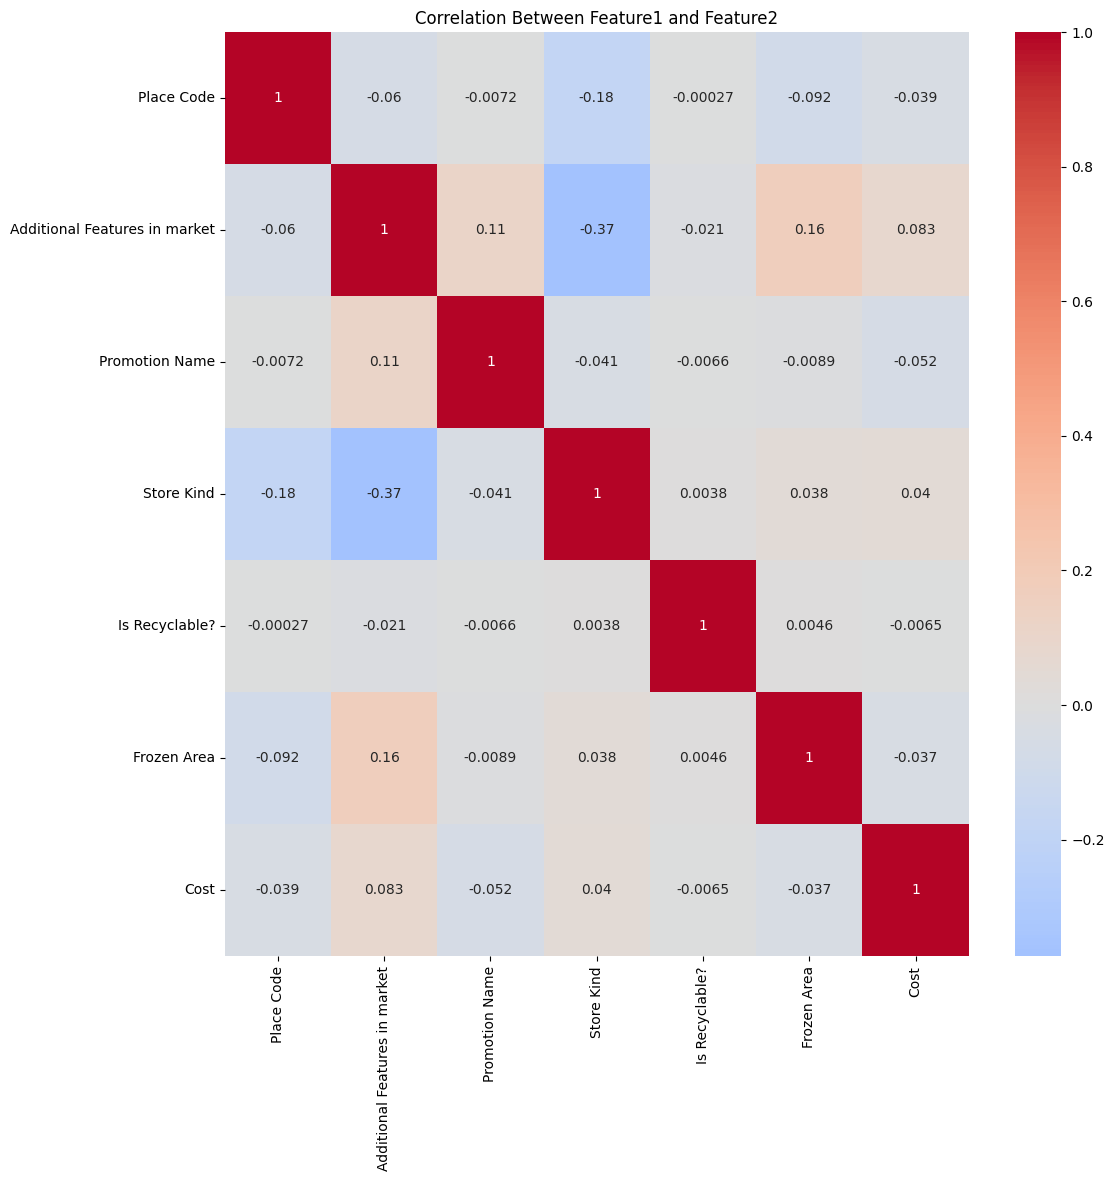

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Feature1 and Feature2')
plt.show()


#### Person Description

In [ ]:
s = df["Person Description"][0].split(' ')
s

['Single',
 'Female',
 'with',
 'four',
 'children,',
 'education:',
 'bachelors',
 'degree',
 'working',
 'as',
 'professional']

In [ ]:
df.head()

# Feature Engineering

> Feature Polynomial

> PCA




scaler

Normalization

<ipython-input-7-1ce0e26227fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

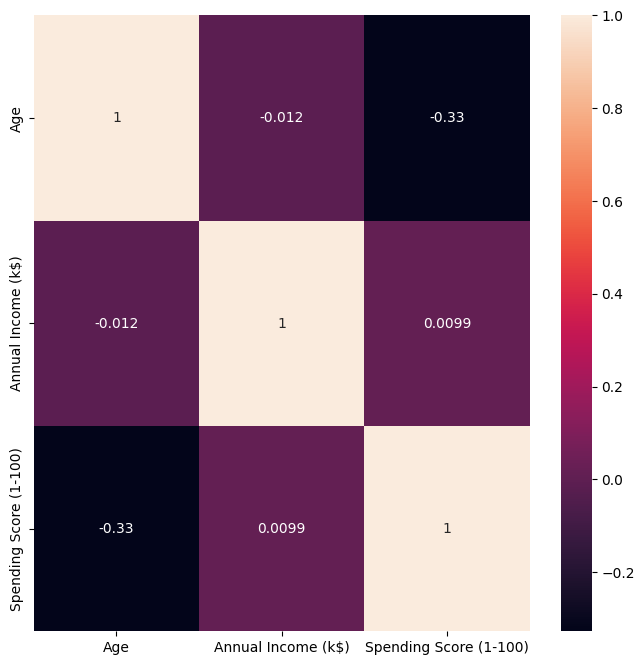

In [ ]:
plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
df["Gender"] = df["Gender"].replace(["Female","Male"],[0,1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test = train_test_split(df,test_size=0.2,random_state=42)


In [ ]:
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26
24,0,54,28,14
122,0,40,69,58


array([[ 0.35      , 44.65      , 26.55      , 20.65      ],
       [ 0.41269841, 44.28571429, 56.42857143, 49.        ],
       [ 0.47058824, 32.94117647, 87.82352941, 82.97058824],
       [ 0.52173913, 39.65217391, 91.2173913 , 16.17391304],
       [ 0.4       , 25.55      , 26.35      , 79.55      ]])

In [ ]:
# plt.scatter(x_train['Gender'],x_train['Age'],x_train['Annual Income (k$)'],x_train['Spending Score (1-100)'], s =50, c='b')
# plt.scatter( 0.41836735, 44.64285714, 58.36734694, 34.8877551, s=200, c='g', marker='s')
# plt.scatter(  0.4516129 , 29.85483871, 64.14516129, 78.46774194, s=200, c='r', marker='s')
# plt.show()

array([1, 2, 0, 0, 1, 2, 4, 4, 2, 1, 1, 2, 4, 1, 1, 1, 3, 1, 3, 1, 2, 1,
       4, 0, 4, 1, 0, 2, 1, 3, 1, 2, 3, 4, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2,
       2, 1, 2, 0, 3, 1, 0, 2, 1, 4, 4, 3, 2, 0, 4, 1, 0, 0, 1, 2, 1, 3,
       0, 1, 1, 1, 3, 0, 3, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 3, 4, 4, 3, 2,
       1, 4, 3, 1, 1, 3, 4, 3, 4, 1, 1, 2, 3, 3, 2, 1, 1, 0, 4, 1, 1, 1,
       3, 2, 1, 0, 4, 1, 2, 2, 4, 1, 2, 3, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1,
       4, 1, 3, 3, 2, 4, 2, 2, 4, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 0, 1, 2, 1], dtype=int32)

array([1, 4, 0, 3, 3, 1, 1, 3, 3, 4, 1, 3, 2, 1, 3, 2, 1, 3, 1, 1, 3, 0,
       3, 1, 1, 1, 1, 1, 2, 1, 4, 0, 1, 1, 3, 1, 2, 2, 3, 1], dtype=int32)

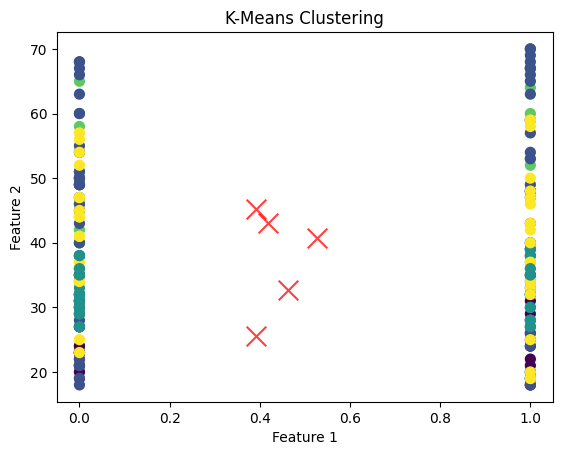

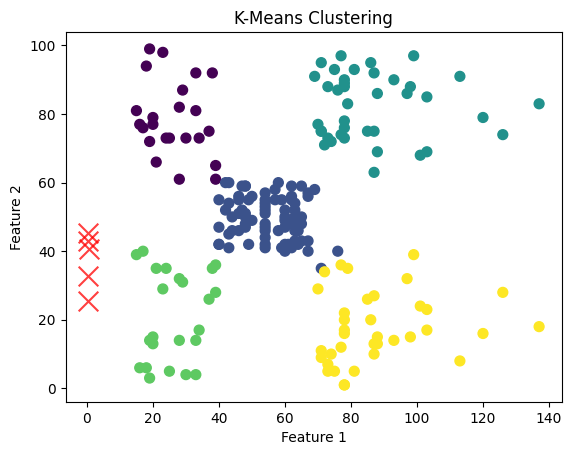

In [ ]:
# Apply K-Means clustering
kmeans1 = KMeans(n_clusters=5,n_init = 10 ,max_iter=300)
kmeans1.fit(df)
y_kmeans = kmeans1.predict(df)

# Plot the data and cluster centers
plt.scatter(df['Gender'],df['Age'], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Plot the data and cluster centers
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()



In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### **Habd text**

In [ ]:
df.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","[Video Store, Ready Food, Florist, Coffee Bar,...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","[Video Store, Ready Food, Florist, Coffee Bar,...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


0        False
1        False
2        False
3        False
4        False
         ...  
19435     True
19436     True
19437     True
19438     True
19439     True
Length: 19440, dtype: bool

--> *no dublicates Found*


In [ ]:
df= df.drop ('CustomerID',axis=1)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df.describe()

,Frozen Area,Cost
count,17506.000000,19416.000000
mean,492.810453,519.620778
std,145.874844,157.423741
min,227.800000,265.631700
25%,440.920000,364.269500
50%,470.270000,516.776300
75%,534.290000,662.222600
max,855.220000,783.192500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19440 non-null  object 
 1   Person Description             19440 non-null  object 
 2   Place Code                     19440 non-null  object 
 3   Customer Order                 19440 non-null  object 
 4   Additional Features in market  15140 non-null  object 
 5   Promotion Name                 16530 non-null  object 
 6   Store Kind                     16530 non-null  object 
 7   Store Sales                    19440 non-null  object 
 8   Store Cost                     19440 non-null  object 
 9   Product Weights Data in (KG)   19440 non-null  object 
 10  Is Recyclable?                 19440 non-null  object 
 11  Min. Yearly Income             19437 non-null  object 
 12  Store Area                     17483 non-null 

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
df1.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
list3 = df2.keys()
list3 = list3.to_list()
list1 = df.keys().to_list()
print(list1)
print(list2)
print(list3)

['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Product Weights Data in (KG)', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']


In [ ]:
df1.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df.rename(columns=new_columns, inplace=True)
df.keys()

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df1.rename(columns=new_columns, inplace=True)
df1.keys()

list2=df1.keys().to_list()

In [ ]:
new_columns_df2 = {'Unnamed: 0' : 'ID', 'Person%20Description' : 'Person Description', 'Place%20Code':'Place Code',
       'Customer%20Order':'Customer Order', 'Additional%20Features%20in%20market':'Additional Features in market',
       'Promotion%20Name':'Promotion Name', 'Store%20Kind':'Store Kind', 'Store%20Sales':'Store Sales', 'Store%20Cost':'Store Cost',
       'Gross%20Weight':'Gross Weight', 'Net%20Weight':'Net Weight', 'Is%20Recyclable?':'Is Recyclable?',
       'Yearly%20Income':'Min. Person Yearly Income', 'Store%20Area':'Store Area', 'Grocery%20Area':'Grocery Area', 'Frozen%20Area':'Frozen Area',
       'Meat%20Area':'Meat Area', 'Cost':'Cost'}
df2.rename(columns=new_columns_df2, inplace=True)
df2.keys()

# #df1
#        'Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
#        'Additional Features in market', 'Promotion Name', 'Store Kind',
#        'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
#        'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
#        'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income',
       'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
common_columns = list(set(df.columns) & set(df1.columns) & set(df2.columns))
batch1_common = df[common_columns]
batch2_common = df1[common_columns]
batch3_common = df2[common_columns]
concatenated_df = pd.concat([batch1_common, batch2_common, batch3_common], ignore_index=True)


In [ ]:
common_key = 'ID'  # Replace with the actual key column name
merged_df = df.merge(df1, on=common_key, how='outer').merge(df2, on=common_key, how='outer')


In [ ]:
df2['Weights%20Data'][0]

"{'Gross Weight': 23.2575, 'Net Weight': 20.3503, 'Package Weight': 2.9072}"

In [ ]:
new_value = ['Video Store', 'Ready Food', 'Florist', 'Coffee Bar', 'Bar For Salad']
my_array = np.array(new_value)

for i in range(df.shape[0]):
  if df['Store Kind'][i] == 'Deluxe' :
    df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']
    str(df['Additional Features in market'][i])

df['Additional Features in market'].value_counts()


<ipython-input-122-cf0da11bb305>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']


[Florist, Bar For Salad, Ready Food, Video Store, Coffee Bar]              6220
['Coffee Bar']                                                             2230
['Florist']                                                                1322
['Ready Food', 'Bar For Salad']                                            1037
['Bar For Salad', 'Ready Food']                                             933
                                                                           ... 
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Ready Food', 'Florist', 'Video Store', 'Bar For Salad', 'Coffee Bar']      10
['Bar For Salad', 'Florist', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Bar For Salad', 'Coffee Bar', 'Video Store', 'Ready Food', 'Florist']       9
['Bar For Salad', 'Video Store', 'Florist', 'Coffee Bar', 'Ready Food']       9
Name: Additional Features in market, Length: 151, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df1 = pd.read_csv('/content/Train_Batch_2.csv',sep=",",encoding="UTF-8")

df1.head()


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
df1.describe()

,Gross Weight,Net Weight,Store Area,Grocery Area,Meat Area,Cost
count,11014.000000,11018.000000,11663.000000,11658.000000,11688.000000,12953.000000
mean,20.032870,17.149701,2598.170053,1773.400262,329.709677,518.565349
std,6.700986,6.804349,524.954453,365.488893,96.819335,155.198098
min,8.721600,4.433500,1882.710000,1233.080000,149.900000,265.631700
25%,14.045325,11.207200,2189.080000,1506.990000,293.577500,364.269500
50%,19.768900,16.861700,2572.860000,1734.500000,313.550000,515.259600
75%,25.728600,23.257500,2864.085000,2052.540000,394.272500,660.235200
max,31.833700,30.234700,3692.840000,2822.650000,570.740000,783.192500


In [ ]:
df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


In [ ]:
df['Person Description'][2]

'Married Male with two children, education: high school degree working as skilled manual'

In [ ]:
df['Promotion Name'][2]

'Shelf Emptiers'

In [ ]:
df2.describe()

,Gross%20Weight,Net%20Weight,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
count,5491.000000,5511.000000,6151.000000,6138.000000,6147.000000,6133.000000,6462.000000
mean,20.153632,17.152036,2602.487761,1779.720722,493.928194,328.839786,519.355948
std,6.683436,6.744036,532.761319,367.559597,147.995833,97.616394,158.578508
min,8.721600,4.491600,1882.710000,1233.240000,227.800000,149.900000,265.631700
25%,14.223400,11.294400,2190.910000,1508.000000,440.920000,293.120000,364.164900
50%,19.914200,16.861700,2572.860000,1734.500000,470.270000,313.550000,516.776300
75%,26.019300,22.966800,2863.465000,2052.550000,534.290000,356.190000,662.222600
max,31.833700,30.234700,7857.550000,2822.610000,1783.640000,570.730000,783.192500


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df2 = pd.read_csv('/content/Train_Batch_3.csv',sep=",",encoding="UTF-8")

df2.head()


,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411
2,mc_ID_2,"Married Male with three children, education: h...",T02ma_WA,"Paper Products from Household department, Orde...","['Coffee Bar', 'Bar For Salad', 'Ready Food', ...",Promo Big,Deluxe,4.98 Millions,2.4402 Millions,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,30K+,3140.99,2055.29,654.13,436.09,267.3576
3,mc_ID_3,"Married Female with five children, education: ...",H11go_ZA,"Snack Foods from Snack Foods department, Order...","['Video Store', 'Coffee Bar', 'Ready Food', 'F...",Price Destroyers,NaN,5.24 Millions,2.0436 Millions,23.6936,NaN,"{'Gross Weight': 23.6936, 'Net Weight': 20.641...",no,10K+,2841.35,2038.11,481.98,322.22,777.2826
4,mc_ID_4,"Married Female with No children, education: pa...",O09ba_VE,"Canned Soup from Canned Foods department, Orde...","['Ready Food', 'Bar For Salad']",Save Price,Supermarket,8.84 Millions,3.4476 Millions,13.6056,10.6839,"{'Gross Weight': 13.6056, 'Net Weight': 10.683...",no,110K+,3236.33,2448.37,472.27,313.87,406.4756


In [ ]:
df2['Additional%20Features%20in%20market'][0]

"['Coffee Bar', 'Florist', 'Ready Food', 'Bar For Salad']"

In [ ]:
df1['Additional Features in market'][0]

"['Video Store', 'Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar']"

In [ ]:
df1.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
import pandas as pd

# Concatenate the DataFrames vertically (along rows)
concatenated_df = pd.concat([df1, df2, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('/content/concatenated.csv', index=False)



In [ ]:
concatenated_df.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574
5,mc_ID_5,"Single Male with four children, education: hig...",S03le_WA,"Candles from Household department, Ordered Bra...",['Coffee Bar'],Weekend Discount,Supermarket,5.22 Millions,1.6182 Millions,"{'Gross Weight': 15.4081, 'Net Weight': 13.954...",recyclable,30K+,1970.17,1236.07,440.92,293.95,364.1649
6,mc_ID_6,"Married Female with five children, education: ...",S04ne_WA,Pain Relievers from Health and Hygiene departm...,NaN,Price Winners,NaN,8.49 Millions,3.7356 Millions,"{'Gross Weight': 17.1524, 'Net Weight': 14.245...",recyclable,130K+,2814.82,2049.72,457.36,304.91,599.3580
7,mc_ID_7,"Married Male with four children, education: pa...",A17co_GU,"Vegetables from Frozen Foods department, Order...",NaN,Shelf Clearing Days,Supermarket,6.57 Millions,2.6937 Millions,"{'Gross Weight': 17.2978, 'Net Weight': 14.376...",recyclable,10K+,NaN,1623.48,341.05,NaN,288.8006
8,mc_ID_8,"Married Male with five children, education: hi...",O09ba_VE,Beer and Wine from Alcoholic Beverages departm...,"['Bar For Salad', 'Ready Food']",Big Time Discounts,Supermarket,2.43 Millions,1.1907 Millions,"{'Gross Weight': 25.1472, 'Net Weight': 23.548...",recyclable,30K+,3236.46,2449.91,472.27,313.55,501.9754
9,mc_ID_9,"Single Male with one child, education: high sc...",S01em_OR,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Video Store', 'Ready Food',...",Lottery Cash Registerion,Deluxe,4.02 Millions,1.2864 Millions,"{'Gross Weight': 14.972, 'Net Weight': 12.0648...",non recyclable,30K+,2572.49,1734.5,503.07,333.55,290.7357


In [ ]:
df1.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884


In [ ]:
df2.head(2)

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411


In [ ]:
concatenated_df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Promotion Name'].value_counts()

Save Price                  676
Weekend Discount            660
Two Day Sale                633
Price Winners               579
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         459
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 407
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               323
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [ ]:
df['Store Kind'].value_counts()

Supermarket      7209
Deluxe           6220
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

In [ ]:
df['Store Sales'].value_counts()

5.04 Millions     99
4.8 Millions      91
5.4 Millions      90
8.52 Millions     89
7.95 Millions     86
                  ..
18.8 Millions      1
1.61 Millions      1
3.21 Millions      1
16.35 Millions     1
19.05 Millions     1
Name: Store Sales, Length: 945, dtype: int64

In [ ]:
df['Gross Weight'][0]

KeyError: ignored

In [ ]:
df['Net Weight'].value_counts()

KeyError: ignored

In [ ]:
df['Package Weight'].value_counts

KeyError: ignored

In [ ]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# getting the dataset's rows and columns by invoking the shape() function
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
